In [138]:
import nltk
import string
import re
import numpy as np
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from spellchecker import SpellChecker
from wordcloud import WordCloud

#***1. Import File***

In [41]:
import pandas as pd

# Specify the file path
file = r'C:\Users\ACER\Desktop\New folder\Python\TEMP\CyberBullyingTypesDataset.csv'

# Create a DataFrame from the list of lines
#df = pd.read_csv(file,header=None,names = ['comments','category'])
df = pd.read_csv(file)

#To change types to numerics
df['category'] = df['category'].replace({'Sexual Harassment': 1, 'Cyberstalking': 2, 'Doxing': 3, 'Revenge Porn': 4, 'Slut Shaming': 5})

# Display the DataFrame
df

,comments,category
0,Post-Cuomo push to toughen NY sexual harassmen...,1
1,Push to toughen NY sexual harassment laws that...,1
2,@GabbieHanna As if Trisha didn’t accuse him of...,1
3,@fentsemadii True is that 🔥 thou I know nothin...,1
4,Watch the recap video of the two-day hands-on ...,1
...,...,...
2135,@missmayim @Jeopardy A travesty that they chos...,5
2136,"@waggykookie They're 11yo cursing, slut shamin...",5
2137,@Cynosure_Nikaaa Just need attention in the na...,5
2138,Y’all hate slut-shaming til you can do it oh okay,5


#***2. Data Preprocessing***

In [42]:
spell = SpellChecker(language='en')
ps = PorterStemmer()
def transform_text(text):

    #To lower
    text = text.lower()

    #Remove Links
    pattern = r'\b(?:https?://|www\.)\S+\b'
    text = re.sub(pattern, '', text)

    #Tokenize
    text = nltk.word_tokenize(text)
    
    #Spelling Correction
    words = text[:]
    misspelled = spell.unknown(words)
    corrected_text = []
    # Correct misspelled words, excluding words with digits
    for word in words:
        if word.isnumeric() or word.isalnum() or word not in misspelled:
            corrected_text.append(word)
        else:
            corrected_word = spell.correction(word)
            if corrected_word is not None:
                corrected_text.append(corrected_word)
            else:
                corrected_text.append(word)
                    
    text = corrected_text[:]
    

    #Remove special characters
    temp = []
    for i in text:
        if i.isalnum():
            temp.append(i)

    text = temp[:]
    temp.clear()

    #Remove stopwords and punctuations
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            temp.append(i)

    #Stemming
    text = temp[:]
    temp.clear()

    for i in text:
        temp.append(ps.stem(i))

    text.clear()
    
    # Remove empty strings
    for word in temp:
        if word != "" and word != "\n":
            text.append(word)
                    
    return ' '.join(text)

In [43]:
df['processed'] = df['comments'].apply(transform_text)
df.head()

,comments,category,processed
0,Post-Cuomo push to toughen NY sexual harassmen...,1,push toughen ny sexual harass law
1,Push to toughen NY sexual harassment laws that...,1,push toughen ny sexual harass law gov cuomo en...
2,@GabbieHanna As if Trisha didn’t accuse him of...,1,gabbiehanna trisha accus sexual harass tri rui...
3,@fentsemadii True is that 🔥 thou I know nothin...,1,fentsemadii true thou know noth sexual harass
4,Watch the recap video of the two-day hands-on ...,1,watch recap video today hanson execut workshop...


#***3. Missing and Duplicate***

In [44]:
df['processed'].isnull().sum()
#cpy = df['processed']

0

In [45]:
df['processed'].duplicated().sum()

177

In [46]:
df.drop_duplicates(subset='processed', inplace=True)

In [47]:
df['processed'].duplicated().sum()

0

In [48]:
df = df.reset_index(drop=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963 entries, 0 to 1962
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   comments   1963 non-null   object
 1   category   1963 non-null   int64 
 2   processed  1963 non-null   object
dtypes: int64(1), object(2)
memory usage: 46.1+ KB


In [50]:
df['processed'].isnull().sum()

0

In [56]:
# Remove empty strings and drop NaN
# Replace empty strings and "\n" with NaN
df['processed'].replace(["", "\n"], np.nan, inplace=True)
df.dropna(subset='processed', inplace=True)

In [58]:
df['processed'].isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1962 entries, 0 to 1962
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   comments   1962 non-null   object
 1   category   1962 non-null   int64 
 2   processed  1962 non-null   object
 3   num_char   1962 non-null   int64 
 4   num_word   1962 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 92.0+ KB


#***4. Exploratory Data Analysis (EDA)***

In [59]:
#Number of characters
df['num_char'] = df['processed'].apply(len)
df.head()

,comments,category,processed,num_char,num_word
0,Post-Cuomo push to toughen NY sexual harassmen...,1,push toughen ny sexual harass law,33,6
1,Push to toughen NY sexual harassment laws that...,1,push toughen ny sexual harass law gov cuomo en...,70,13
2,@GabbieHanna As if Trisha didn’t accuse him of...,1,gabbiehanna trisha accus sexual harass tri rui...,76,11
3,@fentsemadii True is that 🔥 thou I know nothin...,1,fentsemadii true thou know noth sexual harass,45,7
4,Watch the recap video of the two-day hands-on ...,1,watch recap video today hanson execut workshop...,73,11


In [60]:
#Number of words
df['num_word'] = df['processed'].apply(lambda x : len(nltk.word_tokenize(x)))
df.head()

,comments,category,processed,num_char,num_word
0,Post-Cuomo push to toughen NY sexual harassmen...,1,push toughen ny sexual harass law,33,6
1,Push to toughen NY sexual harassment laws that...,1,push toughen ny sexual harass law gov cuomo en...,70,13
2,@GabbieHanna As if Trisha didn’t accuse him of...,1,gabbiehanna trisha accus sexual harass tri rui...,76,11
3,@fentsemadii True is that 🔥 thou I know nothin...,1,fentsemadii true thou know noth sexual harass,45,7
4,Watch the recap video of the two-day hands-on ...,1,watch recap video today hanson execut workshop...,73,11


In [61]:
df[['num_char','num_word']].describe()

,num_char,num_word
count,1962.000000,1962.000000
mean,57.777778,9.098369
std,18.888102,2.964348
min,2.000000,1.000000
25%,46.000000,7.000000
50%,60.000000,10.000000
75%,71.000000,11.000000
max,105.000000,20.000000


In [62]:
df.head()

,comments,category,processed,num_char,num_word
0,Post-Cuomo push to toughen NY sexual harassmen...,1,push toughen ny sexual harass law,33,6
1,Push to toughen NY sexual harassment laws that...,1,push toughen ny sexual harass law gov cuomo en...,70,13
2,@GabbieHanna As if Trisha didn’t accuse him of...,1,gabbiehanna trisha accus sexual harass tri rui...,76,11
3,@fentsemadii True is that 🔥 thou I know nothin...,1,fentsemadii true thou know noth sexual harass,45,7
4,Watch the recap video of the two-day hands-on ...,1,watch recap video today hanson execut workshop...,73,11


In [64]:
#df[df['category']==0][['num_char','num_word']].describe()

In [65]:
df[df['category']==1][['num_char','num_word']].describe()

,num_char,num_word
count,404.000000,404.000000
mean,62.408416,9.779703
std,18.111429,2.894074
min,13.000000,2.000000
25%,51.750000,8.000000
50%,66.000000,10.000000
75%,76.000000,12.000000
max,93.000000,18.000000


In [66]:
df[df['category']==2][['num_char','num_word']].describe()

,num_char,num_word
count,279.000000,279.000000
mean,63.258065,9.200717
std,17.196225,2.677350
min,6.000000,1.000000
25%,52.500000,8.000000
50%,65.000000,10.000000
75%,75.000000,11.000000
max,99.000000,20.000000


In [67]:
df[df['category']==3][['num_char','num_word']].describe()

,num_char,num_word
count,422.000000,422.000000
mean,54.855450,8.540284
std,19.806677,3.035348
min,8.000000,2.000000
25%,42.000000,7.000000
50%,58.000000,9.000000
75%,69.000000,11.000000
max,101.000000,17.000000


In [68]:
df[df['category']==4][['num_char','num_word']].describe()

,num_char,num_word
count,365.000000,365.000000
mean,59.838356,9.419178
std,17.700458,2.761025
min,11.000000,2.000000
25%,49.000000,8.000000
50%,63.000000,10.000000
75%,73.000000,11.000000
max,105.000000,17.000000


In [69]:
df[df['category']==5][['num_char','num_word']].describe()

,num_char,num_word
count,492.000000,492.000000
mean,51.845528,8.721545
std,18.414345,3.120412
min,2.000000,1.000000
25%,39.000000,7.000000
50%,55.000000,9.000000
75%,65.000000,11.000000
max,97.000000,17.000000


#***5. Word Cloud***

In [91]:
wc = WordCloud(width=300,height=300,min_font_size=10,background_color='White')

In [ ]:
'''notcb = wc.generate(df[df['category']==]['processed'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(notcb)'''

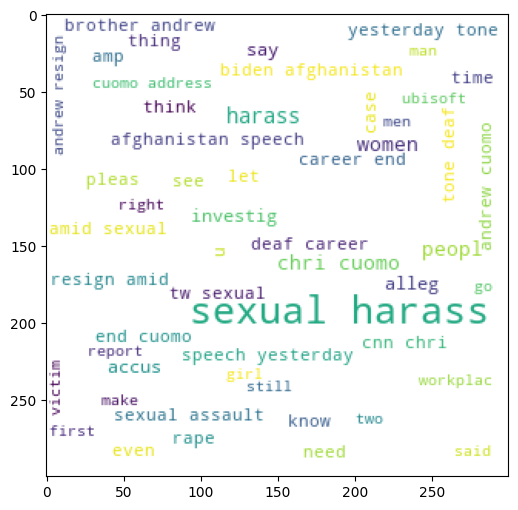

In [97]:
age = wc.generate(df[df['category']==1]['processed'].str.cat(sep=" "))
plt.figure(figsize=(6,6))
plt.imshow(age)

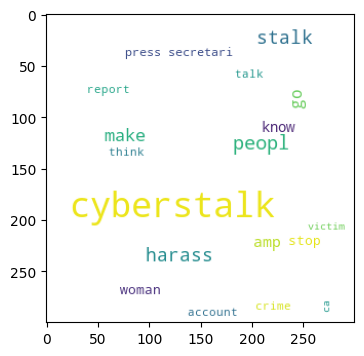

In [99]:
eth = wc.generate(df[df['category']==2]['processed'].str.cat(sep=" "))
plt.figure(figsize=(4,4))
plt.imshow(eth)

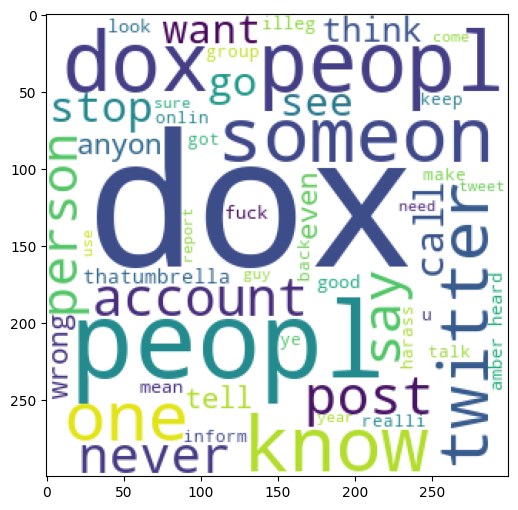

In [101]:
gen = wc.generate(df[df['category']==3]['processed'].str.cat(sep=" "))
plt.figure(figsize=(6,6))
plt.imshow(gen)

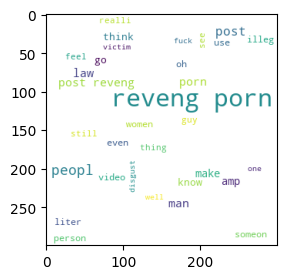

In [103]:
oth = wc.generate(df[df['category']==4]['processed'].str.cat(sep=" "))
plt.figure(figsize=(3,3))
plt.imshow(oth)

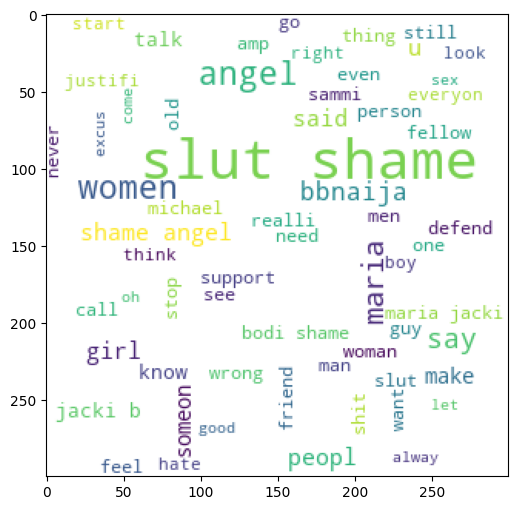

In [105]:
rel = wc.generate(df[df['category']==5]['processed'].str.cat(sep=" "))
plt.figure(figsize=(6,6))
plt.imshow(rel)

In [106]:
df.head()

,comments,category,processed,num_char,num_word
0,Post-Cuomo push to toughen NY sexual harassmen...,1,push toughen ny sexual harass law,33,6
1,Push to toughen NY sexual harassment laws that...,1,push toughen ny sexual harass law gov cuomo en...,70,13
2,@GabbieHanna As if Trisha didn’t accuse him of...,1,gabbiehanna trisha accus sexual harass tri rui...,76,11
3,@fentsemadii True is that 🔥 thou I know nothin...,1,fentsemadii true thou know noth sexual harass,45,7
4,Watch the recap video of the two-day hands-on ...,1,watch recap video today hanson execut workshop...,73,11


#***6. Model Building***

In [107]:
# First use CountVectorizer then TFIDF to compare and choose the one with better results
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [127]:
#1. has better result in cyber bully types dataset
X = cv.fit_transform(df['processed']).toarray()
#2. X = tfidf.fit_transform(df['processed']).toarray()
X.shape

(1962, 4979)

In [128]:
y = df['category'].values
y

array([1, 1, 1, ..., 5, 5, 5], dtype=int64)

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [131]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [132]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [133]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1, average='micro'))

0.5292620865139949
[[38 15  8 16  2]
 [ 6 35  5  7  4]
 [ 5 17 25 18  1]
 [10 26  4 47  4]
 [ 2  3  2 30 63]]
0.5292620865139949


In [134]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2, average='micro'))

0.8524173027989822
[[63  1  4  5  6]
 [ 5 38  8  0  6]
 [ 0  3 62  0  1]
 [ 3  3  4 75  6]
 [ 1  0  1  1 97]]
0.8524173027989822


In [135]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3, average='micro'))

0.7608142493638677
[[61  0  7  0 11]
 [ 6 14 16  0 21]
 [ 1  0 62  0  3]
 [ 0  0  9 65 17]
 [ 1  0  2  0 97]]
0.7608142493638677


In [137]:
import pickle
pickle.dump(cv,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))